In [ ]:
#############################labs

In [201]:
import numpy as np
from matplotlib.pyplot import subplots, cm
import sklearn.model_selection as skm
from ISLP import load_data, confusion_table
from sklearn.svm import SVC
from ISLP.svm import plot as plot_svm
from sklearn.metrics import RocCurveDisplay
roc_curve = RocCurveDisplay.from_estimator
import pandas as pd
import statsmodels.api as sm
from ISLP.models import (summarize,
poly,
ModelSpec as MS)

In [366]:
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning)

In [ ]:
##############################
#9.6.1 Support Vector Classifer

In [ ]:
#demonstrate the use of SVC() on a two-dimensional example

In [ ]:
#checking whether the classes are linearly separable

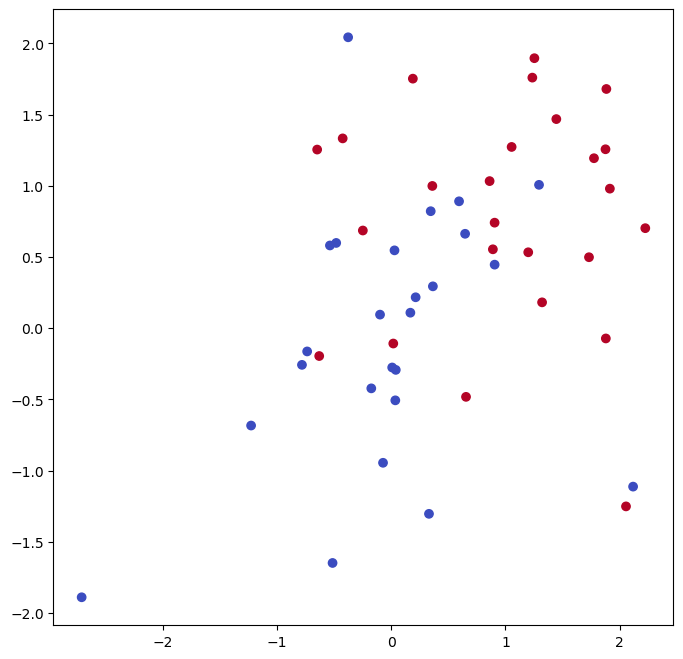

In [3]:
rng = np.random.default_rng(1)
X = rng.standard_normal((50, 2))
y = np.array([-1]*25+[1]*25) #representing two classes -1 and 1
X[y==1] += 1
fig, ax = subplots(figsize=(8,8))
ax.scatter(X[:,0],
           X[:,1],
           c=y,
           cmap=cm.coolwarm);

In [4]:
#fit the classifer
svm_linear = SVC(C=10, kernel='linear')
svm_linear.fit(X, y)

SVC(C=10, kernel='linear')

In [ ]:
#The support vectors are marked with + and the remaining observations are plotted as circles.

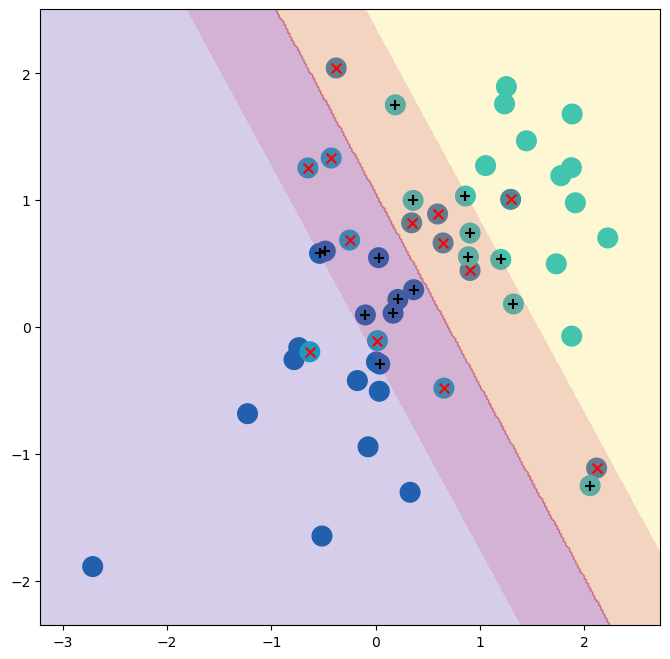

In [5]:
fig, ax = subplots(figsize=(8,8))
plot_svm(X,
         y,
         svm_linear,
         ax=ax)

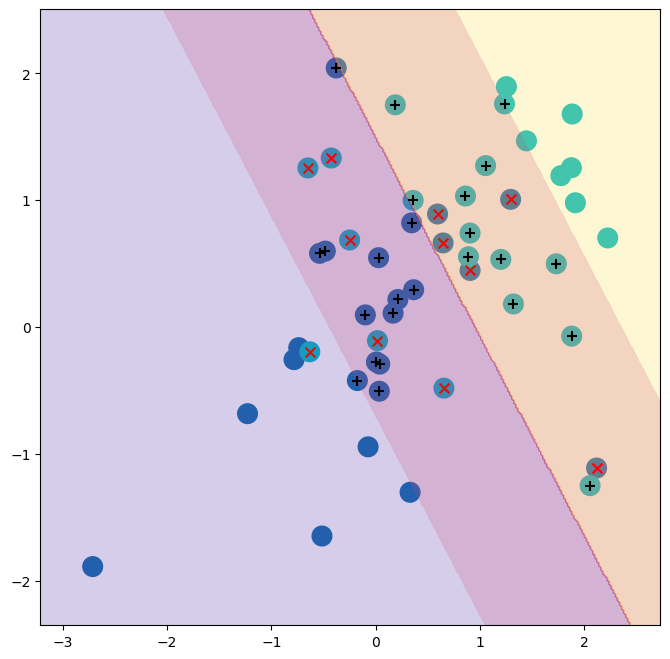

In [6]:
# change c from 10 to 0.1
#a smaller value of the cost parameter , the margin is now wider, obtain a larger number of support vectors
svm_linear_small = SVC(C=0.1, kernel='linear')
svm_linear_small.fit(X, y)
fig, ax = subplots(figsize=(8,8))
plot_svm(X,
y,
svm_linear_small,
ax=ax)

In [7]:
svm_linear.coef_

array([[1.17303943, 0.77348227]])

In [ ]:
#cross-validation

In [8]:
kfold = skm.KFold(5,
random_state=0,
shuffle=True)
grid = skm.GridSearchCV(svm_linear,
                        {'C':[0.001,0.01,0.1,1,5,10,100]},
                        refit=True,
                        cv=kfold,
                        scoring='accuracy')
grid.fit(X, y)

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=SVC(C=10, kernel='linear'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 5, 10, 100]},
             scoring='accuracy')

In [9]:
grid.best_params_

{'C': 1}

In [ ]:
#access the cross-validation errors for each of these models

In [10]:
grid.cv_results_[('mean_test_score')]

array([0.46, 0.46, 0.72, 0.74, 0.74, 0.74, 0.74])

In [11]:
X_test = rng.standard_normal((20, 2))
y_test = np.array([-1]*10+[1]*10)
X_test[y_test==1] += 1

In [12]:
#predict the class labels of these test observations
best_ = grid.best_estimator_
y_test_hat = best_.predict(X_test)
confusion_table(y_test_hat, y_test)

Truth,-1,1
Predicted,,
-1,8,4
1,2,6


In [ ]:
#with this value of C, 70% of the test observations are correctly classifed.

In [13]:
svm_ = SVC(C=0.001,
kernel='linear').fit(X, y)
y_test_hat = svm_.predict(X_test)
confusion_table(y_test_hat, y_test)

Truth,-1,1
Predicted,,
-1,2,0
1,8,10


In [ ]:
#In this case 60% of test observations are correctly classifed.

In [ ]:
#####two classes are linearly separable.

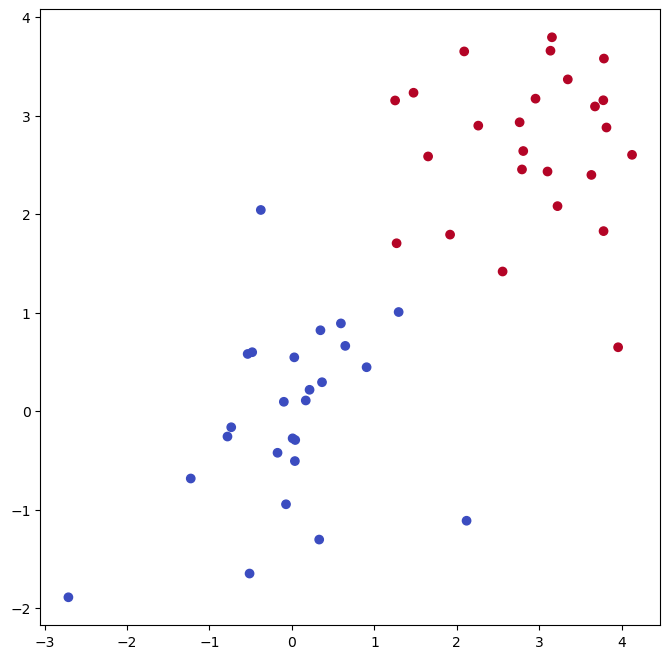

In [27]:
X[y==1] += 1.9;
fig, ax = subplots(figsize=(8,8))
ax.scatter(X[:,0], X[:,1], c=y, cmap=cm.coolwarm);

In [31]:
svm_ = SVC(C=1e5, kernel='linear').fit(X, y)
y_hat = svm_.predict(X)
confusion_table(y_hat, y)

Truth,-1,1
Predicted,,
-1,25,0
1,0,25


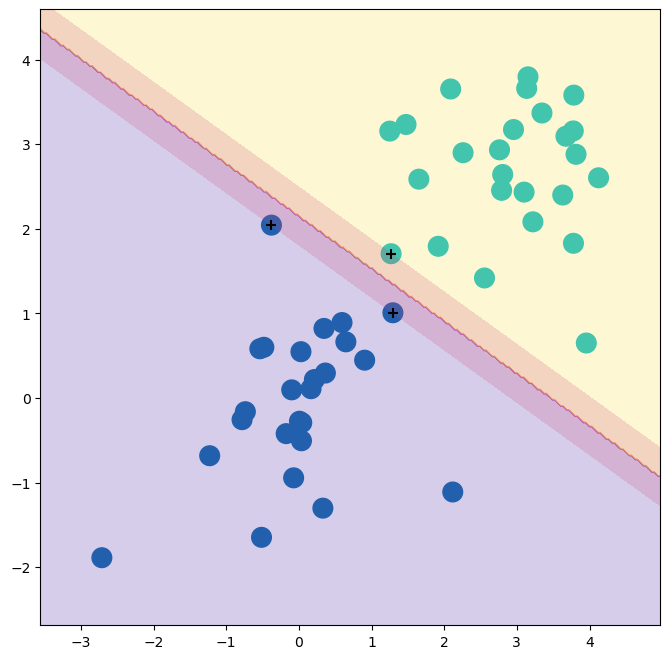

In [32]:
fig, ax = subplots(figsize=(8,8))
plot_svm(X,
         y,
         svm_,
         ax=ax)

In [36]:
svm_ = SVC(C=0.1, kernel='linear').fit(X, y)
y_hat = svm_.predict(X)
confusion_table(y_hat, y)

Truth,-1,1
Predicted,,
-1,25,0
1,0,25


In [ ]:
#Using C=0.1, we again do not misclassify any training observations, but we also obtain a much wider margin and make use of twelve support vectors

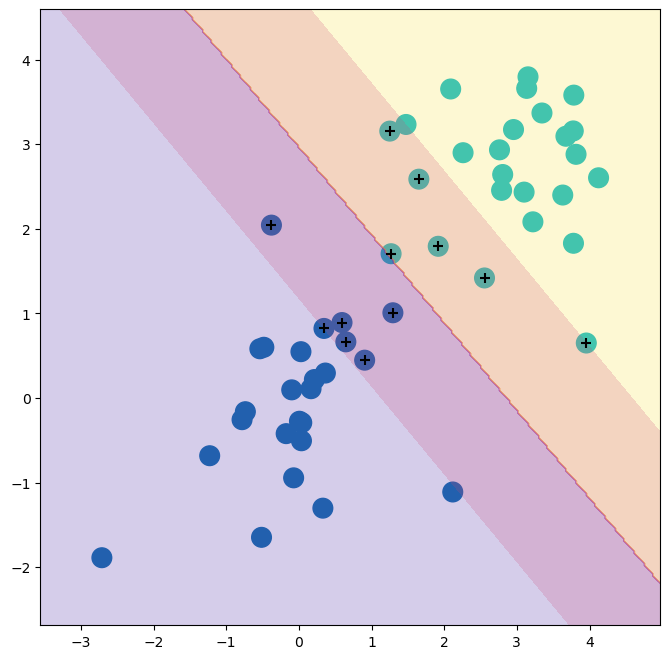

In [37]:
fig, ax = subplots(figsize=(8,8))
plot_svm(X,
y,
svm_,
ax=ax)

In [ ]:
#9.6.2 Support Vector Machine

In [ ]:
# first generate some data with a non-linear class boundary

In [43]:
rng = np.random.default_rng(1)
X = rng.standard_normal((200, 2))
X[:100] += 2
X[100:150] -= 2
y = np.array([1]*150+[2]*50)

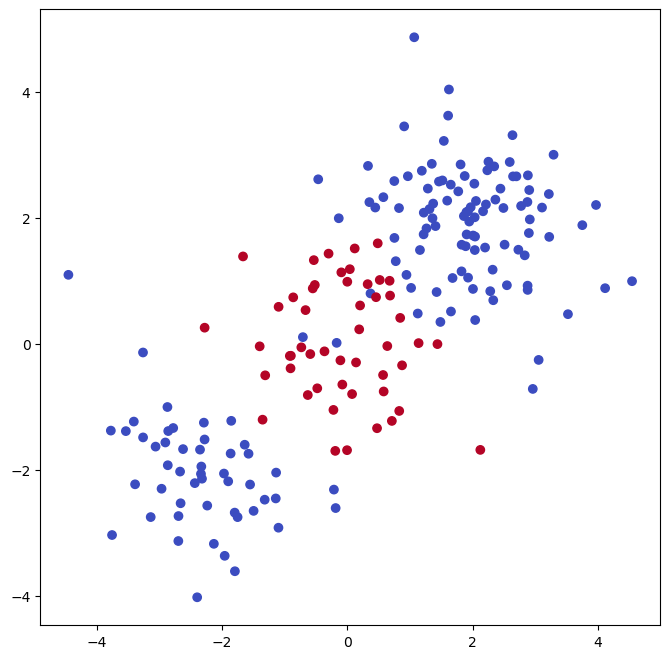

In [53]:
fig, ax = subplots(figsize=(8,8))
ax.scatter(X[:,0],
           X[:,1],
           c=y,
           cmap=cm.coolwarm)

In [54]:
#fit the training data using the SVC() estimator with a radial kernel and γ = 1
(X_train,
X_test,
y_train,
y_test) = skm.train_test_split(X,
                               y,
                               test_size=0.5,
                               random_state=0)
svm_rbf = SVC(kernel="rbf", gamma=1, C=1)
svm_rbf.fit(X_train, y_train)

SVC(C=1, gamma=1)

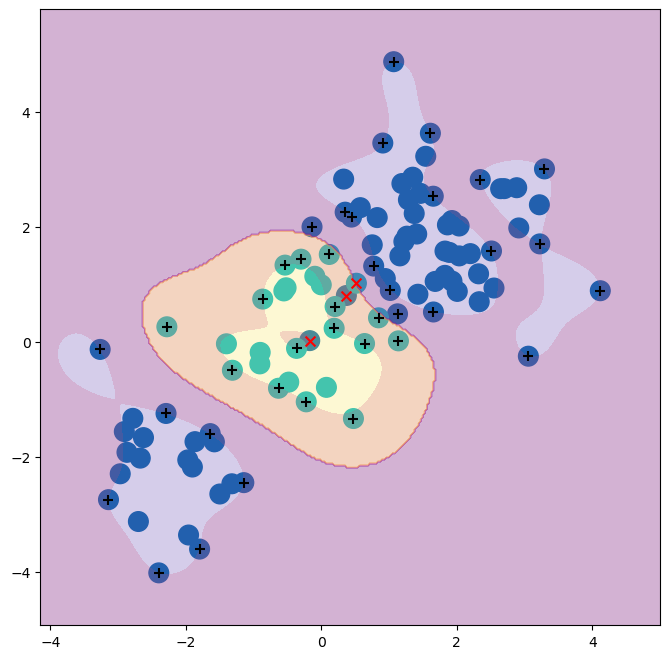

In [55]:
fig, ax = subplots(figsize=(8,8))
plot_svm(X_train,
         y_train,
         svm_rbf,
         ax=ax)

In [ ]:
# there are a fair number of training errors in this SVM ft

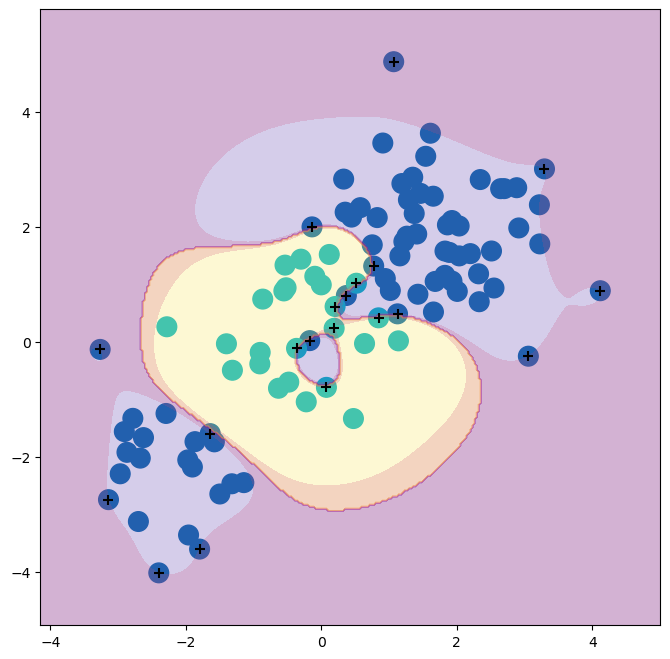

In [56]:
#If we increase the value of C, we can reduce the number of training errors. 
#However, this comes at the price of a more irregular decision boundary that seems to be at risk of overftting the data.
svm_rbf = SVC(kernel="rbf", gamma=1, C=1e5)
svm_rbf.fit(X_train, y_train)
fig, ax = subplots(figsize=(8,8))
plot_svm(X_train,
         y_train,
         svm_rbf,
         ax=ax)

In [ ]:
#perform cross-validation using skm.GridSearchCV()
#to select the best choice of γ and C for an SVM with a radial kernel

In [57]:
kfold = skm.KFold(5,
                  random_state=0,
                  shuffle=True)
grid = skm.GridSearchCV(svm_rbf,
                        {'C':[0.1,1,10,100,1000],
                         'gamma':[0.5,1,2,3,4]},
                        refit=True,
                        cv=kfold,
                        scoring='accuracy');
grid.fit(X_train, y_train)
grid.best_params_

{'C': 1, 'gamma': 1}

Truth,1,2
Predicted,,
1,74,5
2,1,20


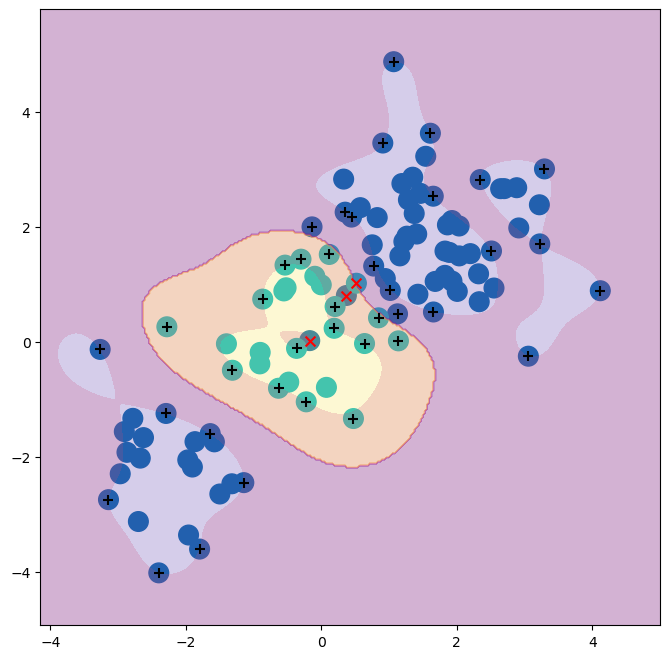

In [58]:
best_svm = grid.best_estimator_
fig, ax = subplots(figsize=(8,8))
plot_svm(X_train,
         y_train,
         best_svm,
         ax=ax)

y_hat_test = best_svm.predict(X_test)
confusion_table(y_hat_test, y_test)

In [ ]:
#12% of test observations are misclassifed by this SVM

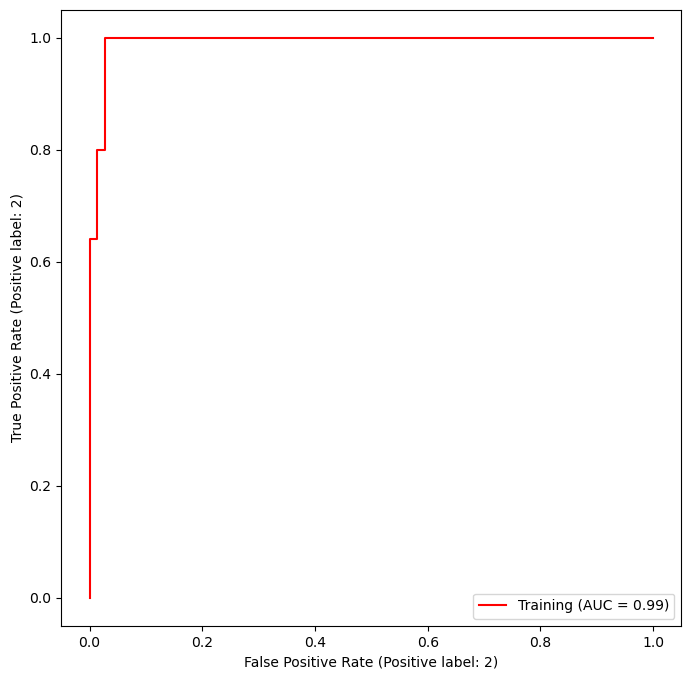

In [60]:
######################
#9.6.3 ROC Curves
fig, ax = subplots(figsize=(8,8))
roc_curve(best_svm,
          X_train,
          y_train,
          name='Training',
          color='r',
          ax=ax);

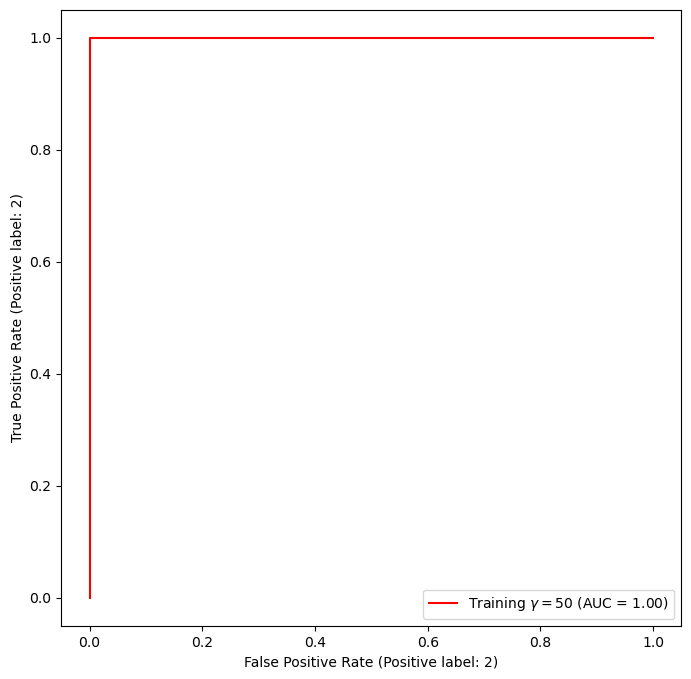

In [61]:
svm_flex = SVC(kernel="rbf",
               gamma=50,
               C=1)
svm_flex.fit(X_train, y_train)
fig, ax = subplots(figsize=(8,8))
roc_curve(svm_flex,
          X_train,
          y_train,
          name='Training $\gamma=50$',
          color='r',
          ax=ax);

In [ ]:
#However, these ROC curves are all on the training data.

In [ ]:
#on the test data

In [62]:
roc_curve(svm_flex,
          X_test,
          y_test,
          name='Test $\gamma=50$',
          color='b',
          ax=ax)
fig;

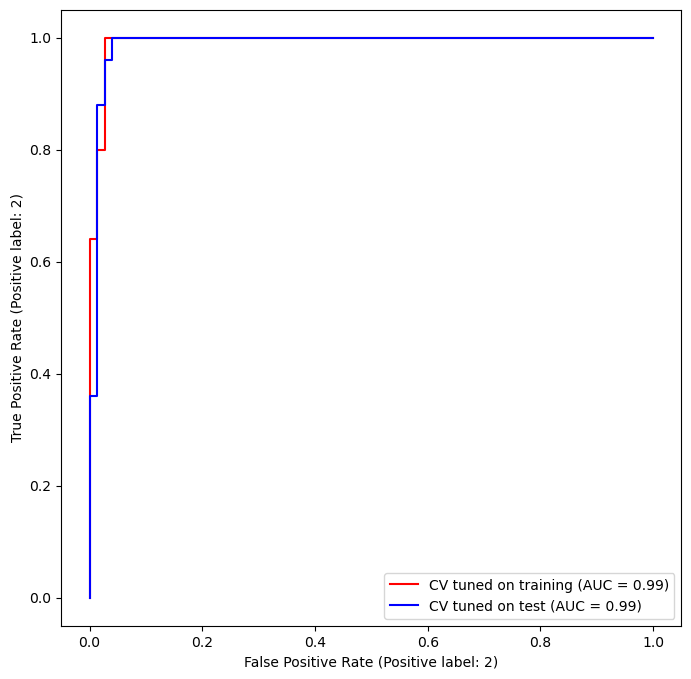

In [63]:
fig, ax = subplots(figsize=(8,8))
for (X_, y_, c, name) in zip(
    (X_train, X_test),
    (y_train, y_test),
    ('r', 'b'),
    ('CV tuned on training',
     'CV tuned on test')):
    roc_curve(best_svm,
              X_,
              y_,
              name=name,
              ax=ax,
              color=c)

In [ ]:
####################
#9.6.4 SVM with Multiple Classes

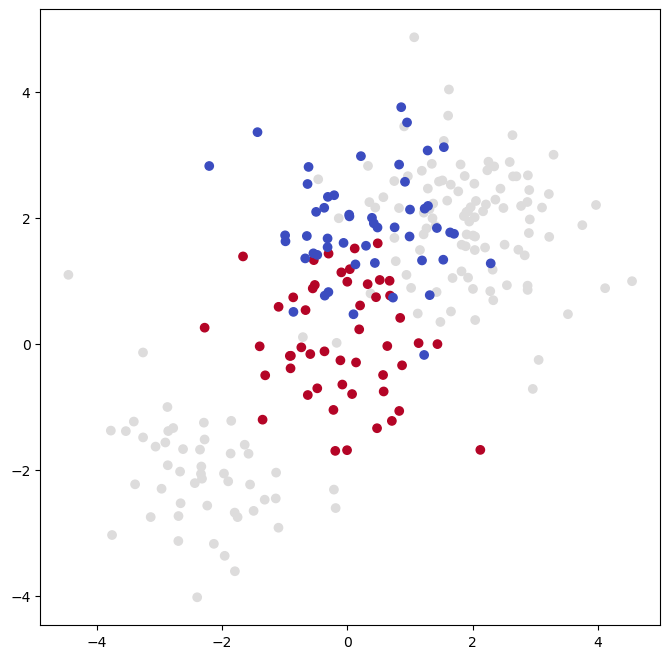

In [64]:
rng = np.random.default_rng(123)
X = np.vstack([X, rng.standard_normal((50, 2))])
y = np.hstack([y, [0]*50])
X[y==0,1] += 2
fig, ax = subplots(figsize=(8,8))
ax.scatter(X[:,0], X[:,1], c=y, cmap=cm.coolwarm);

In [ ]:
# now fit an SVM to the data:

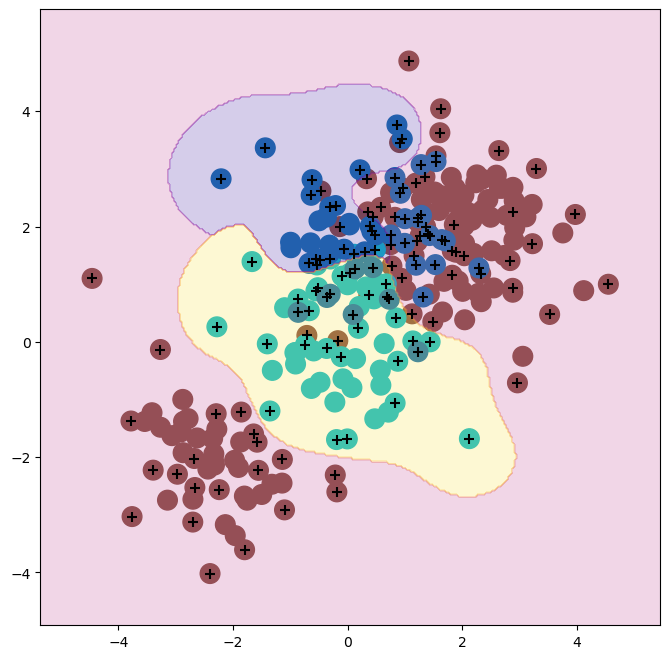

In [65]:
svm_rbf_3 = SVC(kernel="rbf",
                C=10,
                gamma=1,
                decision_function_shape='ovo');
svm_rbf_3.fit(X, y)
fig, ax = subplots(figsize=(8,8))
plot_svm(X,
         y,
         svm_rbf_3,
         scatter_cmap=cm.tab10,
         ax=ax)

In [ ]:
#9.6.5 Application to Gene Expression Data

In [ ]:
#examine the Khan data set, which consists of a number of tissue
#samples corresponding to four distinct types of small round blue cell tumors.

In [66]:
Khan = load_data('Khan')
Khan['xtrain'].shape, Khan['xtest'].shape

((63, 2308), (20, 2308))

In [ ]:
#In this data set, there is a very large number of features relative to the number of observations.

In [ ]:
#This suggests that we should use a linear kernel, because the additional fexibility that will result
#from using a polynomial or radial kernel is unnecessary.

In [68]:
khan_linear = SVC(kernel='linear', C=10)
khan_linear.fit(Khan['xtrain'], Khan['ytrain'])
confusion_table(khan_linear.predict(Khan['xtrain']),
                Khan['ytrain'])

Truth,1,2,3,4
Predicted,,,,
1,8,0,0,0
2,0,23,0,0
3,0,0,12,0
4,0,0,0,20


In [ ]:
#see that there are no training errors.

In [69]:
confusion_table(khan_linear.predict(Khan['xtest']),
                Khan['ytest'])

Truth,1,2,3,4
Predicted,,,,
1,3,0,0,0
2,0,6,2,0
3,0,0,4,0
4,0,0,0,5


In [ ]:
##################
#9.7 Exercises

In [ ]:
#4.Generate a simulated two-class data set with 100 observations and 
#two features in which there is a visible but non-linear separation between the two classes.

In [140]:
rng = np.random.default_rng(1)
X = rng.standard_normal((100, 2))
X[:20] += 1
X[20:40] -= 2
y = np.array([1]*50+[2]*50)

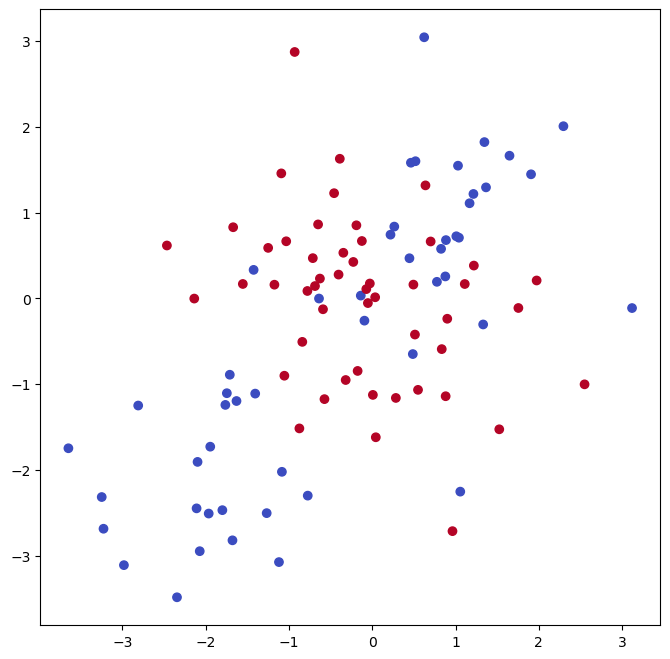

In [141]:
fig, ax = subplots(figsize=(8,8))
ax.scatter(X[:,0],
           X[:,1],
           c=y,
           cmap=cm.coolwarm)

In [142]:
(X_train,
X_test,
y_train,
y_test) = skm.train_test_split(X,
                               y,
                               test_size=0.5,
                               random_state=0)

In [143]:
#a polynomial kernel
svm_poly = SVC(kernel="poly", degree=2)
svm_poly.fit(X_train, y_train)

SVC(degree=2, kernel='poly')

In [144]:
kfold = skm.KFold(5,
                  random_state=0,
                  shuffle=True)
grid_poly = skm.GridSearchCV(svm_poly,
                        {'degree':[2,3,4,5]},
                        refit=True,
                        cv=kfold,
                        scoring='accuracy');
grid_poly.fit(X_train, y_train)
grid_poly.best_params_

{'degree': 2}

Truth,1,2
Predicted,,
1,13,1
2,13,23


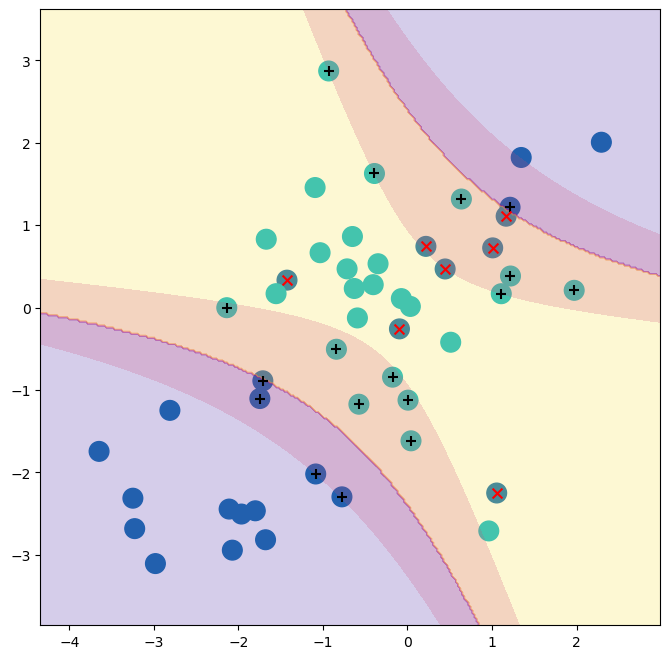

In [145]:
best_poly = grid_poly.best_estimator_
fig, ax = subplots(figsize=(8,8))
plot_svm(X_train,
         y_train,
         best_poly,
         ax=ax)

y_hat_test = best_poly.predict(X_test)
confusion_table(y_hat_test, y_test)

In [148]:
#fit the training data using the SVC() estimator with a radial kernel and γ = 0.5
svm_rbf = SVC(kernel="rbf", gamma=0.5, C=10)
svm_rbf.fit(X_train, y_train)

SVC(C=10, gamma=0.5)

In [149]:
kfold = skm.KFold(5,
                  random_state=0,
                  shuffle=True)
grid = skm.GridSearchCV(svm_rbf,
                        {'C':[0.1,1,10,100,1000],
                         'gamma':[0.5,1,2,3,4]},
                        refit=True,
                        cv=kfold,
                        scoring='accuracy');
grid.fit(X_train, y_train)
grid.best_params_

{'C': 10, 'gamma': 0.5}

Truth,1,2
Predicted,,
1,18,3
2,8,21


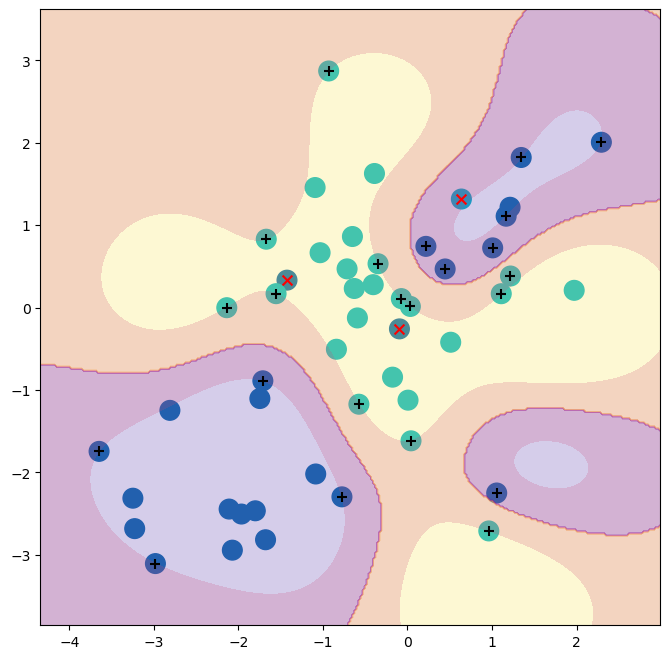

In [150]:
best_svm = grid.best_estimator_
fig, ax = subplots(figsize=(8,8))
plot_svm(X_train,
         y_train,
         best_svm,
         ax=ax)

y_hat_test = best_svm.predict(X_test)
confusion_table(y_hat_test, y_test)

In [151]:
#test error rates
11/50

0.22

In [ ]:
#Which technique performs best on the test data?
#a radial kernel

In [ ]:
#5.

In [ ]:
#obtain a non-linear decision boundary by performing logistic regression using non-linear transformations of the features.

In [541]:
rng = np.random.default_rng(5)
x1 = rng.uniform(size=500) - 0.5
x2 = rng.uniform(size=500) - 0.5
y = x1**2 - x2**2 > 0

In [ ]:
#b) Plot the observations

Text(0, 0.5, 'X2')

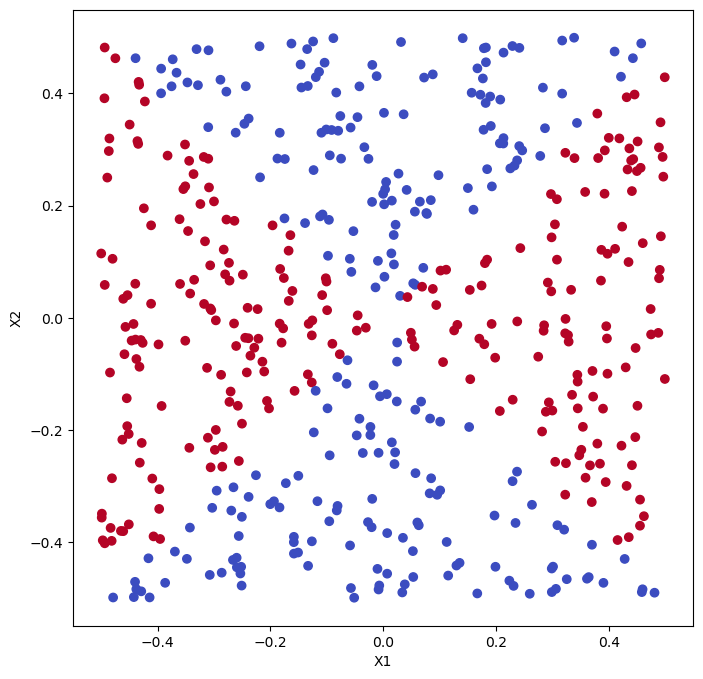

In [542]:
fig, ax = subplots(figsize=(8,8))
ax.scatter(x1,
           x2,
           c=y,
           cmap=cm.coolwarm)
ax.set_xlabel('X1')
ax.set_ylabel('X2')

In [ ]:
#c) Fit a logistic regression model to the data, using X1 and X2 as predictors.

In [543]:
df = pd.DataFrame({'x1': x1, 'x2': x2, 'y': y})
X = df[['x1', 'x2']]
X = sm.add_constant(X)
glm = sm.GLM(y,
             X,
             family=sm.families.Binomial())
results = glm.fit()
summarize(results)  

,coef,std err,z,P>|z|
const,0.0221,0.090,0.246,0.805
x1,-0.1662,0.308,-0.540,0.589
x2,0.0901,0.306,0.294,0.769


In [169]:
#d) Apply this model to the training data

In [544]:
probs = results.predict(exog=X)
labels = np.zeros(len(probs))  
labels[probs > 0.5] = 1 
confusion_table(labels, y)

Truth,False,True
Predicted,,
False,65,104
True,182,149


In [ ]:
#e) Now fit a logistic regression model to the data using non-linear functions of X1 and X2 as predictors

In [545]:
poly_X = MS([poly('x1', degree=2), poly('x2', degree=1)]).fit(df)
X = poly_X.transform(df)
glm = sm.GLM(y,
             X,
             family=sm.families.Binomial())
B = glm.fit()
summarize(B)

,coef,std err,z,P>|z|
intercept,0.1207,0.107,1.125,0.261
"poly(x1, degree=2)[0]",-1.9424,2.561,-0.759,0.448
"poly(x1, degree=2)[1]",29.4626,2.882,10.222,0.000
"poly(x2, degree=1)",1.6843,2.363,0.713,0.476


In [ ]:
#f) Apply this model to the training data in order to obtain a predicted class label for each training observation.

In [546]:
probs = B.predict(exog = X)
labels = np.zeros(len(probs))  
labels[probs > 0.5] = 1 
confusion_table(labels, y)

Truth,False,True
Predicted,,
False,194,76
True,53,177


In [ ]:
# Plot the observations, colored according to the predicted class labels. The decision boundary should be obviously non-linear. If it is not,
#then repeat (a)–(e) until you come up with an example in which the predicted class labels are obviously non-linear.

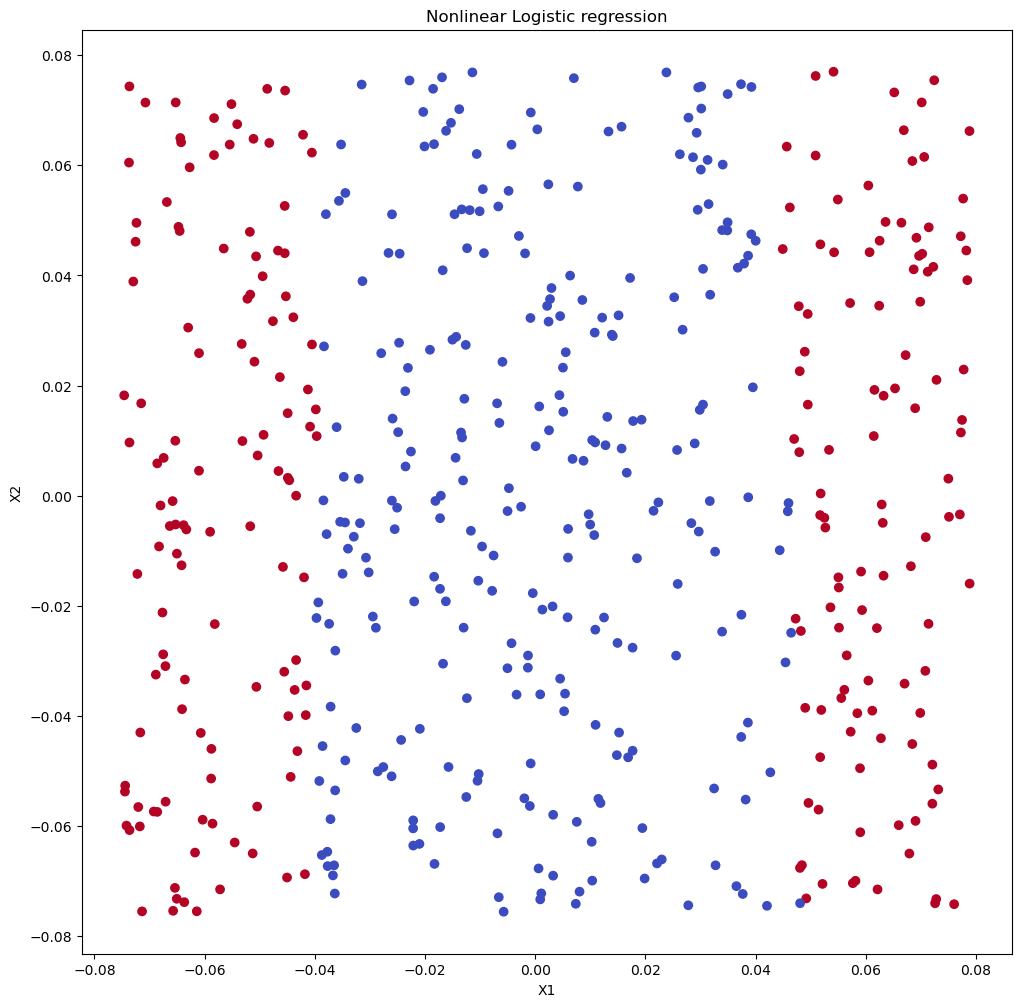

In [547]:
glm_pred = B.predict(X)
labels=np.where(glm_pred>0.5,True,False)
fig,ax=subplots(figsize=(12,12))
ax.scatter(X.iloc[:, 1],X.iloc[:, 3],c=labels,cmap=cm.coolwarm)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_title('Nonlinear Logistic regression');

In [548]:
#g) Fit a support vector classifer to the data with X1 and X2 as predictors. 
#Obtain a class prediction for each training observation. Plot the observations, colored according to the predicted class labels.
df = pd.DataFrame({'x1': x1, 'x2': x2, 'y': y})
X = df[['x1', 'x2']]
svm_linear = SVC(C=10, kernel='linear')
svm_linear.fit(X, y)

SVC(C=10, kernel='linear')

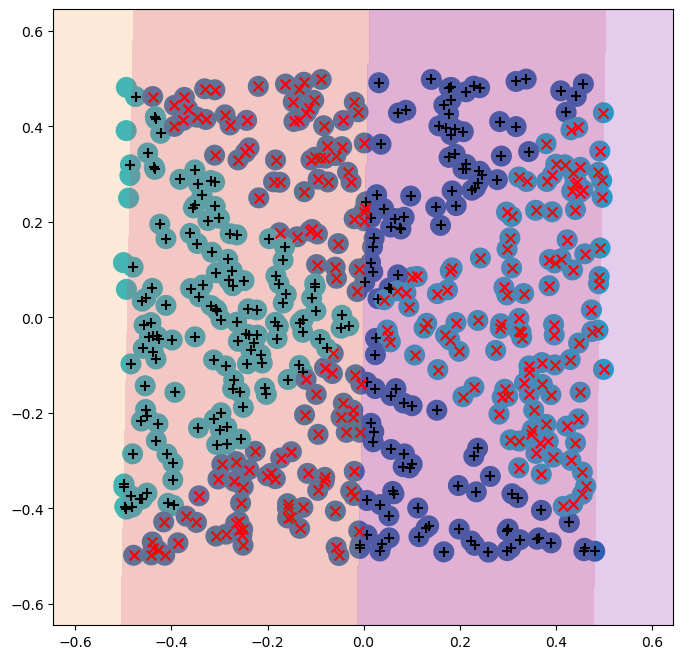

In [549]:
fig, ax = subplots(figsize=(8,8))
plot_svm(X,
         y,
         svm_linear,
         ax=ax);

In [ ]:
#h) Fit a SVM using a non-linear kernel to the data. Obtain a class prediction for each training observation. Plot the observations,
#colored according to the predicted class labels.

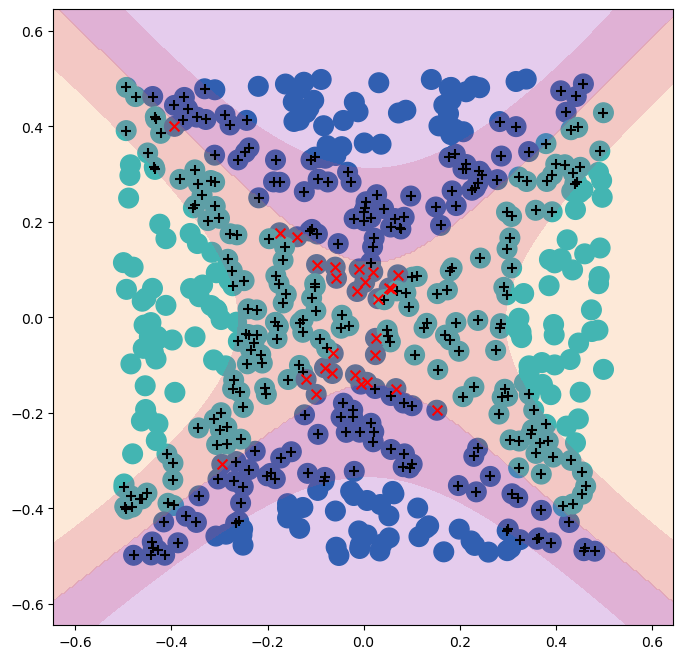

In [550]:
svm_rbf = SVC(kernel="rbf", gamma=1, C=1)
svm_rbf.fit(X, y)
fig, ax = subplots(figsize=(8,8))
plot_svm(X,
         y,
         svm_rbf,
         ax=ax)

In [ ]:
##########6.

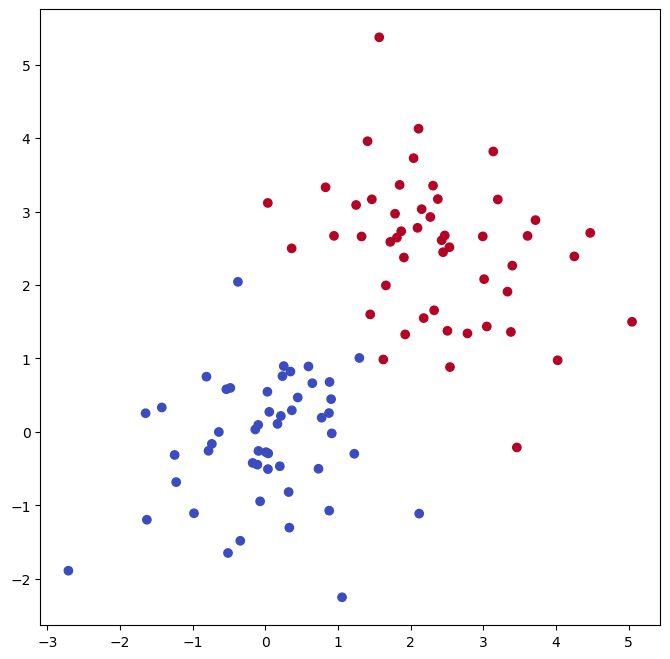

In [407]:
#a) Generate two-class data with p = 2
rng = np.random.default_rng(1)
X = rng.standard_normal((100, 2))
y = np.array([-1]*50+[1]*50)
X[y==1] += 2.5
fig, ax = subplots(figsize=(8,8))
ax.scatter(X[:,0],
X[:,1],
c=y,
cmap=cm.coolwarm);

In [408]:
#b)Compute the cross-validation error rates for support vector classifers with a range of C values.
svm_linear = SVC(C=10, kernel='linear')
svm_linear.fit(X, y)
kfold = skm.KFold(5,
random_state=0,
shuffle=True)
grid = skm.GridSearchCV(svm_linear,
                        {'C':[0.001,0.01,0.1,1,5,10,100]},
                        refit=True,
                        cv=kfold,
                        scoring='accuracy')
grid.fit(X, y)
grid.best_params_

{'C': 0.01}

In [409]:
best_ = grid.best_estimator_
y_hat = best_.predict(X)
confusion_table(y_hat, y)

Truth,-1,1
Predicted,,
-1,50,0
1,0,50


In [410]:
1- grid.cv_results_[('mean_test_score')]

array([0.42, 0.01, 0.01, 0.01, 0.01, 0.02, 0.02])

In [ ]:
#no misclassifed training observations which could be indicated by the 0.01 error score

In [411]:
#c) Generate an appropriate test data set
X_test = rng.standard_normal((50, 2))
y_test = np.array([-1]*25+[1]*25)
X_test[y_test==1] += 2.5

In [412]:
kfold = skm.KFold(5,
random_state=0,
shuffle=True)
grid_t = skm.GridSearchCV(svm_linear,
                        {'C':[0.001,0.01,0.1,1,5,10,100]},
                        refit=True,
                        cv=kfold,
                        scoring='accuracy')
grid_t.fit(X_test, y_test)
grid_t.best_params_

{'C': 0.01}

In [413]:
best_ = grid.best_estimator_
y_test_hat = best_.predict(X_test)
confusion_table(y_test_hat, y_test)

Truth,-1,1
Predicted,,
-1,24,1
1,1,24


In [414]:
1- grid_t.cv_results_[('mean_test_score')]

array([0.3 , 0.02, 0.04, 0.02, 0.02, 0.02, 0.02])

In [ ]:
#C= 0.01 still leads to the smallest error
#the best parameter doesn't change

In [ ]:
#7.base on Auto

In [ ]:
#(a)Create a binary variable that takes on a 1 for cars with gas mileage above the median, and a 0 for cars with gas mileage below the median.

In [415]:
Auto=load_data("Auto")

In [440]:
Auto['mpg_b'] = np.where(Auto['mpg']>np.median(Auto['mpg']),1,0)
y = Auto['mpg_b']

In [ ]:
#b) Fit a support vector classifer to the data with various values of C

In [460]:
X

,intercept,horsepower,weight,acceleration
name,,,,
chevrolet chevelle malibu,1.0,130,3504,12.0
buick skylark 320,1.0,165,3693,11.5
plymouth satellite,1.0,150,3436,11.0
amc rebel sst,1.0,150,3433,12.0
ford torino,1.0,140,3449,10.5
...,...,...,...,...
ford mustang gl,1.0,86,2790,15.6
vw pickup,1.0,52,2130,24.6
dodge rampage,1.0,84,2295,11.6


In [461]:
design = MS(Auto[['displacement', 'horsepower','weight','acceleration']]).fit(Auto)
#y = np.array(Auto['mpg_b'])
X = design.transform(Auto)
svm_linear = SVC(C=10, kernel='linear')
svm_linear.fit(X, y)

SVC(C=10, kernel='linear')

In [462]:
kfold = skm.KFold(5,
                  random_state=0,
                  shuffle=True)
grid = skm.GridSearchCV(svm_linear,
                        {'C':[0.001,0.01,0.1,1,5,10,100]},
                        refit=True,
                        cv=kfold,
                        scoring='accuracy')
grid.fit(X, y)
grid.best_params_

{'C': 0.1}

In [463]:
1 - grid.cv_results_[('mean_test_score')]

array([0.10457644, 0.10457644, 0.09694904, 0.11989614, 0.12239533,
       0.11983122, 0.11979877])

In [466]:
#c)
svm_rbf = SVC(kernel="rbf", C=1)
svm_rbf.fit(X, y)
kfold = skm.KFold(5,
                  random_state=0,
                  shuffle=True)
grid_rbf = skm.GridSearchCV(svm_rbf,
                        {'C':[0.1,1,10,100,1000],
                         'gamma':[0.5,1,2,3,4]},
                        refit=True,
                        cv=kfold,
                        scoring='accuracy');
grid_rbf.fit(X, y)
grid_rbf.best_params_

{'C': 1, 'gamma': 0.5}

In [467]:
1 - grid.cv_results_[('mean_test_score')]

array([0.10457644, 0.10457644, 0.09694904, 0.11989614, 0.12239533,
       0.11983122, 0.11979877])

In [ ]:
#

In [468]:
svm_poly = SVC(kernel="poly", C=1, degree=2)
svm_poly.fit(X, y)
kfold = skm.KFold(5,
                  random_state=0,
                  shuffle=True)
grid_poly = skm.GridSearchCV(svm_poly,
                        {'C':[0.1,1,10,100,1000],
                         'degree':[1,2,3,4,5]},
                        refit=True,
                        cv=kfold,
                        scoring='accuracy');
grid_poly.fit(X, y)
grid_poly.best_params_

{'C': 100, 'degree': 2}

In [469]:
1 - grid_poly.cv_results_[('mean_test_score')]

array([0.13268419, 0.12233041, 0.13002272, 0.13258682, 0.13261928,
       0.1222655 , 0.12229796, 0.11976631, 0.13002272, 0.13005518,
       0.1222655 , 0.12233041, 0.11983122, 0.11733204, 0.11729958,
       0.10704317, 0.10201233, 0.10457644, 0.10710808, 0.10714054,
       0.10714054, 0.11220383, 0.10963973, 0.11473548, 0.10967218])

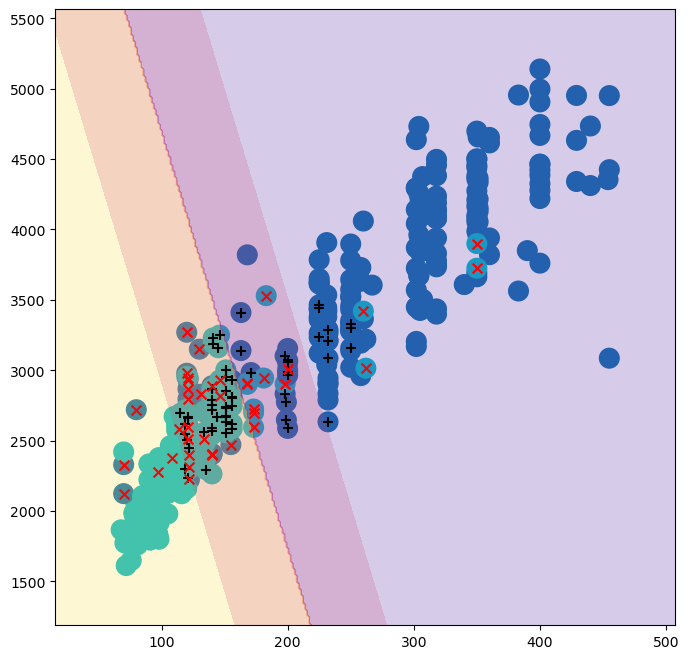

In [465]:
#d)
fig, ax = subplots(figsize=(8,8))
plot_svm(X,
         y,
         grid.best_estimator_,
         features=(1,3),
         ax=ax)



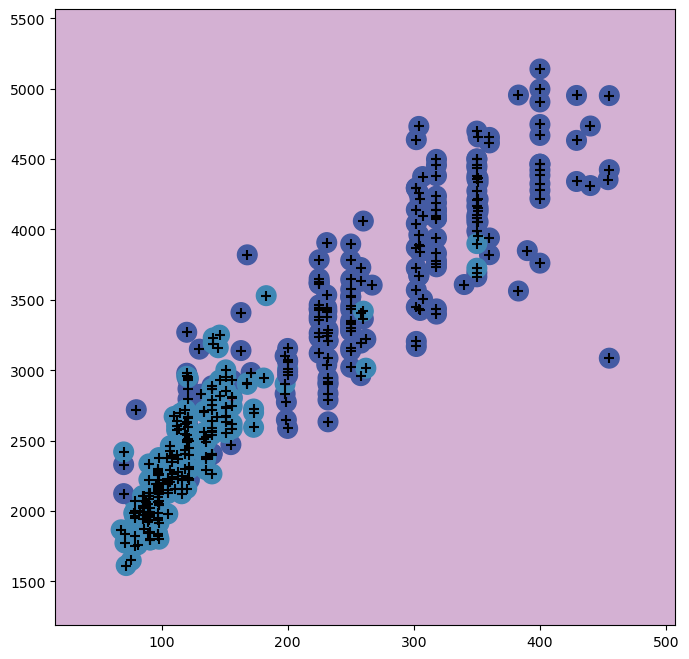

In [470]:
#d)
fig, ax = subplots(figsize=(8,8))
plot_svm(X,
         y,
         grid_rbf.best_estimator_,
         features=(1,3),
         ax=ax)


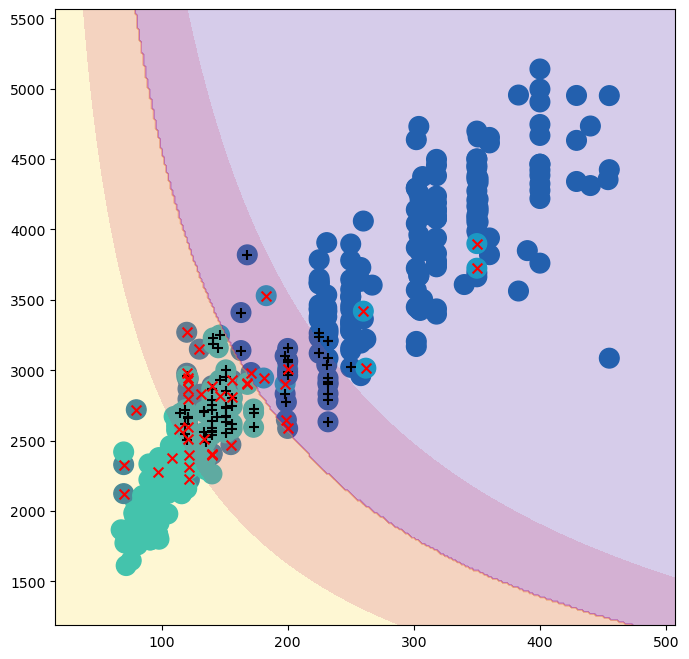

In [473]:
fig, ax = subplots(figsize=(8,8))
plot_svm(X,
         y,
         grid_poly.best_estimator_,
         features=(1,3),
         ax=ax)

In [492]:
#8. This problem involves the OJ data set which is part of the ISLPpackage
OJ = load_data("OJ")
X = MS(OJ.columns.drop('Purchase'), intercept=False).fit_transform(OJ)
y = OJ['Purchase']
(X_train,
X_test,
y_train,
y_test) = skm.train_test_split(X,
                               y,
                               train_size=800,
                               random_state=66)

In [493]:
#b)Fit a support vector classifer to the training data using C = 0.01
svm_linear = SVC(C=0.01, kernel='linear')
svm_linear.fit(X_train, y_train)

SVC(C=0.01, kernel='linear')

In [494]:
svm_linear.n_support_

array([304, 303], dtype=int32)

In [495]:
#607

In [496]:
#c) What are the training and test error rates?
y_train_hat = svm_linear.predict(X_train)
confusion_table(y_train_hat, y_train)

Truth,CH,MM
Predicted,,
CH,453,131
MM,41,175


In [497]:
(41+131)/800

0.215

In [498]:
y_test_hat = svm_linear.predict(X_test)
confusion_table(y_test_hat, y_test)

Truth,CH,MM
Predicted,,
CH,138,61
MM,21,50


In [499]:
(21+61)/270

0.3037037037037037

In [522]:
#d) Use cross-validation to select an optimal C. Consider values in the range 0.01 to 10.
kfold = skm.KFold(5,
                  random_state=0,
                  shuffle=True)
grid = skm.GridSearchCV(svm_linear,
                        {'C':[0.01,0.1,1,5,10]},
                        refit=True,
                        cv=kfold,
                        scoring='accuracy')
grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=SVC(C=0.01, kernel='linear'),
             param_grid={'C': [0.01, 0.1, 1, 5, 10]}, scoring='accuracy')

In [523]:
grid.best_params_

{'C': 1}

In [524]:
y_train_hat = grid.best_estimator_.predict(X_train)
confusion_table(y_train_hat, y_train)

Truth,CH,MM
Predicted,,
CH,443,69
MM,51,237


In [525]:
(69+51)/800

0.15

In [526]:
y_test_hat = grid.best_estimator_.predict(X_test)
confusion_table(y_test_hat, y_test)

Truth,CH,MM
Predicted,,
CH,137,33
MM,22,78


In [527]:
(33+22)/270

0.2037037037037037

In [532]:
#(f) Repeat parts (b) through (e) using a support vector machine with a radial kernel. Use the default value for gamma.
svm_rbf = SVC(kernel="rbf", gamma=1, C=10)
kfold = skm.KFold(5,
                  random_state=0,
                  shuffle=True)
grid = skm.GridSearchCV(svm_rbf,
                        {'gamma':[0.5,1,2,3,4]},
                        refit=True,
                        cv=kfold,
                        scoring='accuracy');
grid.fit(X_train, y_train)
grid.best_params_

{'gamma': 0.5}

In [533]:
y_train_hat = grid.best_estimator_.predict(X_train)
confusion_table(y_train_hat, y_train)

Truth,CH,MM
Predicted,,
CH,467,48
MM,27,258


In [534]:
(27+48)/800

0.09375

In [535]:
y_test_hat = grid.best_estimator_.predict(X_test)
confusion_table(y_test_hat, y_test)

Truth,CH,MM
Predicted,,
CH,133,41
MM,26,70


In [536]:
(26+41)/270

0.24814814814814815

In [537]:
#g) Repeat parts (b) through (e) using a support vector machine with a polynomial kernel. Set degree = 2.
svm_poly = SVC(kernel="poly", C=10, degree=2)
kfold = skm.KFold(5,
                  random_state=0,
                  shuffle=True)
grid = skm.GridSearchCV(svm_poly,
                        {'C':[0.01,0.1,1,5,10],
                        'degree':[2,3,4,5]},
                        refit=True,
                        cv=kfold,
                        scoring='accuracy');
grid.fit(X_train, y_train)
grid.best_params_

{'C': 0.01, 'degree': 2}

In [554]:
svm_poly = SVC(kernel="poly", C=0.01, degree=2).fit(X_train, y_train)

In [555]:
y_train_hat = svm_poly.predict(X_train)
confusion_table(y_train_hat, y_train)

Truth,CH,MM
Predicted,,
CH,494,306
MM,0,0


In [556]:
y_test_hat = svm_poly.predict(X_test)
confusion_table(y_test_hat, y_test)

Truth,CH,MM
Predicted,,
CH,159,111
MM,0,0


In [ ]:
#using a support vector machine with a radial kernel